In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt

In [2]:
df=pd.read_csv("LoanStats3a.csv",sep=',',low_memory=False)

In [3]:
df2=pd.DataFrame(columns=df.iloc[0].name)

In [4]:
for i in range(1,10001):
    df2.loc[i-1]=df.iloc[i].name
#     print(i,'\b\b\b\b',end=' ')

In [5]:
df3=pd.DataFrame()
df3=df2.copy()

In [6]:
df3.dropna(axis=1, how='all',inplace=True)

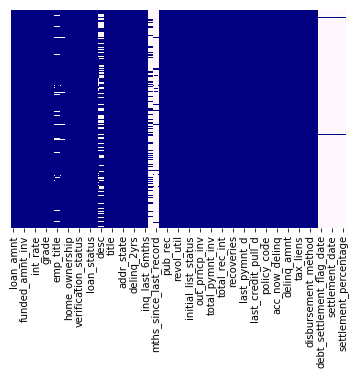

In [7]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='gist_ncar')

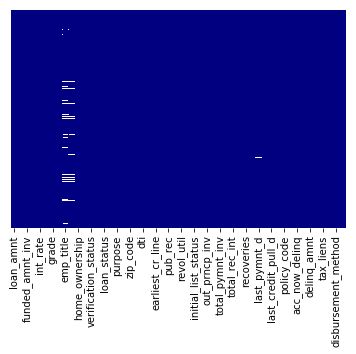

In [8]:
df3.drop('debt_settlement_flag_date',axis=1,inplace=True)
df3.drop('settlement_date',axis=1,inplace=True)
df3.drop('settlement_percentage',axis=1,inplace=True)
df3.drop('settlement_status',axis=1,inplace=True)
df3.drop('settlement_amount',axis=1,inplace=True)
df3.drop('mths_since_last_record',axis=1,inplace=True)
df3.drop('inq_last_6mths',axis=1,inplace=True)
df3.drop('mths_since_last_delinq',axis=1,inplace=True)
df3.drop('desc',axis=1,inplace=True)
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='gist_ncar')

In [9]:
df3.fillna("",inplace=True)
# df3=df3.replace(df3.isna(),'')

In [10]:
df3[df3.isna()]=''

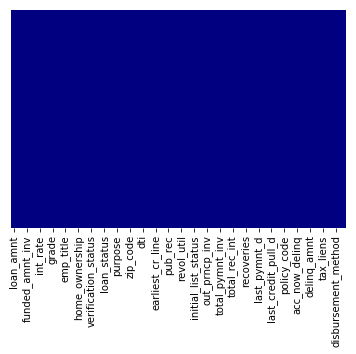

In [11]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='gist_ncar')

In [12]:
df4=pd.DataFrame()
df4=df3.copy()

In [13]:
df4['debt-to-income']=df4.annual_inc.astype(np.float16)/12/df4['revol_bal'].astype(int)

In [14]:
df4.term=df4.term.str.replace('months', '')
df4.term.head()
df4.term=df4.term.astype(int)

In [15]:
df4.drop('revol_util',axis=1,inplace=True)

In [16]:
df4.emp_length.replace('','000',inplace=True)

In [17]:
df4['emp_length'] = df4.emp_length.str.extract('(\d+)')
# df4.emp_length.replace([x for x in df4.emp_length.unique() if x!=x],'',inplace=True)
df4.emp_length=df4.emp_length.astype(int)

In [18]:
df4.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [19]:
df4.grade.replace("A",1,inplace=True)
df4.grade.replace("B",2,inplace=True)
df4.grade.replace("C",3,inplace=True)
df4.grade.replace("D",4,inplace=True)
df4.grade.replace("E",5,inplace=True)
df4.grade.replace("F",6,inplace=True)
df4.grade.replace("G",7,inplace=True)

In [20]:
df4.int_rate=df4.int_rate.str.replace('%','')

In [21]:
# for i in df4.columns:
#     if 
df4=df4.convert_objects(convert_numeric=True)

/Users/qasimch86/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
df4.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64')]

In [23]:
df4.drop(df4.columns[df4.dtypes==object],axis=1,inplace=True)

In [24]:
df4.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64')]

In [25]:
for i in df4.columns:
    if len(df4[i].unique())<=2:
        print('Column '+i+' is same in almost all entries')
        df4.drop(i,axis=1,inplace=True)
    else:
        A=df4[i].unique()

Column term is same in almost all entries
Column emp_title is same in almost all entries
Column out_prncp is same in almost all entries
Column out_prncp_inv is same in almost all entries
Column collections_12_mths_ex_med is same in almost all entries
Column policy_code is same in almost all entries
Column acc_now_delinq is same in almost all entries
Column chargeoff_within_12_mths is same in almost all entries
Column delinq_amnt is same in almost all entries
Column tax_liens is same in almost all entries


In [26]:
df4['debt-to-income']=df4['debt-to-income'].replace([np.inf, -np.inf],np.mean(df4['debt-to-income']!=np.inf))
# df4.dropna(axis=1,how='all',inplace=True)

In [27]:
df4.drop('title',axis=1,inplace=True)

In [28]:
np.isnan(df4).any(0)

loan_amnt                  False
funded_amnt                False
funded_amnt_inv            False
int_rate                   False
installment                False
grade                      False
emp_length                 False
annual_inc                 False
dti                        False
delinq_2yrs                False
open_acc                   False
pub_rec                    False
revol_bal                  False
total_acc                  False
total_pymnt                False
total_pymnt_inv            False
total_rec_prncp            False
total_rec_int              False
total_rec_late_fee         False
recoveries                 False
collection_recovery_fee    False
last_pymnt_amnt            False
pub_rec_bankruptcies       False
debt-to-income             False
dtype: bool

In [29]:
df5=df4.copy()

In [30]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
y=df5.int_rate.astype(int)
df6=df5.drop('int_rate',axis=1)

/Users/qasimch86/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/qasimch86/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [31]:
n_estimator = 10
# X, y = make_classification(n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(df6, y, test_size=0.7)

X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train, y_train, test_size=0.7)

In [33]:
grd = GradientBoostingClassifier(n_estimators=n_estimator)
# grd_enc = preprocessing.LabelEncoder()
grd_enc = preprocessing.OneHotEncoder()
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(X_train)
# grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

# y_pred_grd_lm = grd_lm.predict_proba(
#     grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
# fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [34]:
cv_score = cross_validation.cross_val_score(grd, df6[df6.columns], y, cv=3, scoring='roc_auc')

ValueError: multiclass format is not supported

In [35]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = df5.copy()
target = 'int_rate'
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=3):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [36]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target]]

In [37]:
gbm0 = GradientBoostingClassifier(random_state=10)

In [38]:
modelfit(gbm0, train, predictors)

ValueError: Unknown label type: 'continuous'